# NIAID DATA HUB: DMID-LHV Data Analysis

### DMID-LHV Scientific User Cases

The following part of the demo is focused on answering some specific scientific questions based on the data currently available at the NIAID Data Hub

#### Install and require dependent packages

In [1]:
source("nde_dmid_function.r")

Bioconductor version 3.10 (BiocManager 1.30.9), R 3.6.0 (2019-04-26)
Installing package(s) 'limma'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'BH', 'BiocManager', 'broom', 'callr', 'caTools', 'cli', 'covr',
  'curl', 'data.table', 'DBI', 'digest', 'DT', 'forecast', 'fracdiff',
  'GenomicAlignments', 'ggpubr', 'haven', 'Hmisc', 'htmlTable', 'igraph',
  'IRanges', 'IRkernel', 'knitr', 'maftools', 'Matrix', 'mgcv', 'nlme', 'plyr',
  'prodlim', 'quadprog', 'R6', 'Rcpp', 'RcppArmadillo', 'repr', 'rhdf5',
  'rlang', 'rmarkdown', 'RMySQL', 'roxygen2', 'Rsamtools', 'RSQLite',
  'rversions', 'rvest', 'S4Vectors', 'scales', 'selectr', 'survival',
  'testthat', 'tidyverse', 'tinytex', 'TTR', 'vctrs', 'xfun'
Loading required package: httr
Warning message:
“package ‘httr’ was built under R version 3.6.1”Loading required package: jsonlite
Warning message:
“package ‘jsonlite’ was built under R version 3.6.1”Loading required package: dplyr
Warning messa

#### Scientific User Case 2.1: RNA-microarray differential gene expression time course analysis on virus infection 

#### Query meta data for study ECL001

In [2]:
parse_cell_file("ECL001","RNA","mrna_microarrays")

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
HuCoV EMC_NA,0,GSM1096530_ECL001_EMC_0hr.txt,36599f7f-a8b6-4615-9c54-e35f8eaa169a
HuCoV EMC_NA,0,GSM1096512_ECL001_EMC_0hr.txt,dcd8699f-b793-4d85-a736-b9a7bb9ed8c9
HuCoV EMC_NA,0,GSM1096515_ECL001_EMC_0hr.txt,bcc9d23a-af12-4f49-b522-0e8b493fe58a
HuCoV EMC_NA,3,GSM1096517_ECL001_EMC_3hr.txt,f51fef67-13d8-4e01-9444-a95a6de76af8
HuCoV EMC_NA,3,GSM1096542_ECL001_EMC_3hr.txt,3ad547d1-3265-4981-9cc3-b94c7719a583
HuCoV EMC_NA,3,GSM1096521_ECL001_EMC_3hr.txt,d8da3255-193f-4755-90ae-0f73c3f4f190
HuCoV EMC_NA,7,GSM1096518_ECL001_EMC_7hr.txt,35f7d99f-7b50-44a9-b2ed-3711a7c89809
HuCoV EMC_NA,7,GSM1096541_ECL001_EMC_7hr.txt,d19fe76d-0d7f-4f7c-b54b-98cd5c990014
HuCoV EMC_NA,7,GSM1096535_ECL001_EMC_7hr.txt,5f3b9a52-2182-4893-9847-f31a3a05712d


#### Download mRNA_microarray files for study ECL001

In [3]:
download_data("ECL001","RNA","mrna_microarrays")

[1] 36599f7f-a8b6-4615-9c54-e35f8eaa169a
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] dcd8699f-b793-4d85-a736-b9a7bb9ed8c9
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] bcc9d23a-af12-4f49-b522-0e8b493fe58a
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] f51fef67-13d8-4e01-9444-a95a6de76af8
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] 3ad547d1-3265-4981-9cc3-b94c7719a583
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] d8da3255-193f-4755-90ae-0f73c3f4f190
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] 35f7d99f-7b50-44a9-b2ed-3711a7c89809
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] d19fe76d-0d7f-4f7c-b54b-98cd5c990014
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] 5f3b9a52-2182-4893-9847-f31a3a05712d
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] 6edef8b1-6ea4-48d0-9fd9-da476289ec6e
32 Levels: 36599f7f-a8b6-4615-9c54-e35f8eaa169a ...
[1] 12d65891-ad67-4d0e-b177-b3da11c1068a
32 Levels: 36599f7f-a8b6-4615

[1] "Finished Downloading"

#### Perform differential gene expression analysis for study ECL001. "HuCoV_EMC_NA" infection vs Control is compared across all timepoints except for 18h, save the result as "ECL001.mock_NAvsHuCoV_EMC_NA.DE.txt"

In [4]:
DE_gene("ECL001",c("mock_NA","HuCoV_EMC_NA"),c(18))

Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096530_ECL001_EMC_0hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096512_ECL001_EMC_0hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096515_ECL001_EMC_0hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096517_ECL001_EMC_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096542_ECL001_EMC_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096521_ECL001_EMC_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096518_ECL001_EMC_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096541_ECL001_EMC_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096535_ECL001_EMC_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096514_ECL001_Mock_0hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ECL001_mrna_microarrays/GSM1096531_ECL001_Mock_0hr.tx

,HuCoV_EMC_NA.0.mock_NA.0,HuCoV_EMC_NA.3.mock_NA.3,HuCoV_EMC_NA.7.mock_NA.7,HuCoV_EMC_NA.12.mock_NA.12,HuCoV_EMC_NA.24.mock_NA.24,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SSX2,-0.035295741,0.33680200,4.329572202,4.82998804,5.133264,9.158507,2589.7229,3.268390e-32,9.903548e-28
HSPA6,0.067224248,-0.04330616,0.608605199,4.30635877,4.689058,8.937123,840.3289,2.580157e-26,3.909067e-22
A_24_P717824,-0.001012243,0.16480346,4.557631681,7.08738628,10.313268,9.601457,646.6054,6.025266e-25,6.085719e-21
C12orf35,-0.073320255,0.07262631,0.120519884,0.95309952,3.430807,11.263007,601.0144,1.449634e-24,9.702982e-21
A_32_P105730,-0.064792538,0.45251949,2.371061417,4.60604052,8.337782,10.527708,596.0588,1.601099e-24,9.702982e-21
SNCG,-0.072544857,-0.02088843,0.067721212,0.32041534,2.891666,7.918947,556.0366,3.686431e-24,1.861709e-20
ENST00000525678,-0.120387044,0.06881584,0.158988725,0.62741449,3.677056,7.775399,525.1816,7.310028e-24,3.164302e-20
AA432215,0.095433069,-0.06088061,0.115535979,0.33922297,3.662423,7.512418,511.1710,1.010829e-23,3.828639e-20
A_32_P217346,0.039804284,0.04986131,0.228521585,0.74975738,4.116988,8.274359,504.5382,1.182092e-23,3.979840e-20


#### Parse meta data, download files and perform DE gene analysis for other studies

In [5]:
parse_cell_file("ICL004","RNA","mrna_microarrays")
download_data("ICL004","RNA","mrna_microarrays")
DE_gene("ICL004",c("mock_NA","VN1203_NA"))

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
VN1203_NA,3,GSM697586_ICL004_VN1203_3hr.txt,915edc3a-b35b-4fb9-9bd8-53c0b5708448
VN1203_NA,3,GSM697585_ICL004_VN1203_3hr.txt,d7fe92d0-b16f-41e7-92d0-8af2e0ea84c5
VN1203_NA,3,GSM697587_ICL004_VN1203_3hr.txt,16e9ce4b-9600-4fe2-b5cc-b62f26fcbf1d
mock_NA,7,GSM697570_ICL004_Mock_7hr.txt,03eab734-ca9e-48ae-a717-04d080135d9c
mock_NA,7,GSM697572_ICL004_Mock_7hr.txt,7be7dbaa-01dc-431f-b0fb-490b54d31dab
mock_NA,7,GSM697571_ICL004_Mock_7hr.txt,dcd5bed7-49c2-451b-beb1-44bcb847e49a
mock_NA,18,GSM697576_ICL004_Mock_18hr.txt,eeb8eb47-ebd7-4298-8a8a-87d008805f1b
mock_NA,18,GSM697578_ICL004_Mock_18hr.txt,86dfb3b6-9d48-458e-a8ea-37eba207a0cd
mock_NA,18,GSM697577_ICL004_Mock_18hr.txt,5fb19ee2-159f-46f5-bdaa-ccb67e2bfd8c


[1] 915edc3a-b35b-4fb9-9bd8-53c0b5708448
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] d7fe92d0-b16f-41e7-92d0-8af2e0ea84c5
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 16e9ce4b-9600-4fe2-b5cc-b62f26fcbf1d
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 03eab734-ca9e-48ae-a717-04d080135d9c
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 7be7dbaa-01dc-431f-b0fb-490b54d31dab
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] dcd5bed7-49c2-451b-beb1-44bcb847e49a
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] eeb8eb47-ebd7-4298-8a8a-87d008805f1b
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 86dfb3b6-9d48-458e-a8ea-37eba207a0cd
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 5fb19ee2-159f-46f5-bdaa-ccb67e2bfd8c
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 0b71e105-4c17-446f-9a4a-f9b2e5bd47f4
36 Levels: 915edc3a-b35b-4fb9-9bd8-53c0b5708448 ...
[1] 5527abd9-38f5-474f-a6b9-d91d38a39edf
36 Levels: 915edc3a-b35b-4fb9

[1] "Finished Downloading"

Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697586_ICL004_VN1203_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697585_ICL004_VN1203_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697587_ICL004_VN1203_3hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697570_ICL004_Mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697572_ICL004_Mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697571_ICL004_Mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697576_ICL004_Mock_18hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697578_ICL004_Mock_18hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697577_ICL004_Mock_18hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697598_ICL004_VN1203_24hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL004_mrna_microarrays/GSM697597_ICL004_V

,VN1203_NA.0.mock_NA.0,VN1203_NA.3.mock_NA.3,VN1203_NA.7.mock_NA.7,VN1203_NA.12.mock_NA.12,VN1203_NA.18.mock_NA.18,VN1203_NA.24.mock_NA.24,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DNHD2,0.0079367383,0.027511551,0.3006563,2.651869,3.365161,3.068970,7.797045,3683.147,1.253280e-36,3.820498e-32
CDH16,0.0177585640,-0.036559073,0.2318334,2.355434,3.729341,4.369120,7.771895,2954.519,2.158606e-35,3.290147e-31
SAG,-0.0433236174,0.056256087,1.0356016,2.936708,3.651911,3.761827,7.805034,2633.255,9.539696e-35,9.693604e-31
THC2646425,-0.0175209200,0.077614556,0.9217589,2.571674,3.535075,3.289626,8.276465,2125.481,1.514020e-33,1.153834e-29
HBEGF,0.0128602753,0.056496971,0.1060718,2.691773,4.168402,4.790557,9.651386,1976.520,3.865656e-33,2.356813e-29
A_32_P108420,-0.0625282088,0.103913002,0.7171179,2.832128,3.750523,4.078972,8.901085,1875.189,7.621408e-33,3.872183e-29
PLXNA1,-0.0274676175,-0.062109763,-0.5004814,-1.556496,-1.982574,-1.902619,9.770655,1768.025,1.627914e-32,7.089332e-29
RFPL3S,-0.0051973344,0.001842450,1.1021832,2.295142,2.949902,3.107861,7.872908,1721.753,2.291683e-32,8.732457e-29
THC2518705,0.0056245721,0.016629626,0.5636960,2.859258,3.835234,3.965469,8.232039,1679.088,3.167138e-32,9.948099e-29


In [6]:
parse_cell_file("ICL006","RNA","mrna_microarrays")
download_data("ICL006","RNA","mrna_microarrays")
DE_gene("ICL006",c("mock_NA","CA04_NA"))

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
CA04_NA,7,GSM921920_ICL006_CA04_7hr.txt,f6637228-573c-47f9-af80-2828d17229f1
CA04_NA,7,GSM921921_ICL006_CA04_7hr.txt,83b0f514-b54b-4915-afe9-0cd241d1dc1f
CA04_NA,7,GSM921919_ICL006_CA04_7hr.txt,86526920-29ef-405a-b545-27db733e6fa6
mock_NA,7,GSM921893_ICL006_mock_7hr.txt,36964e5d-ea77-4b59-ae30-b434da964494
mock_NA,7,GSM921892_ICL006_mock_7hr.txt,d31ed7a7-72fe-47ec-8ee9-d0d8a78edbfe
mock_NA,7,GSM921894_ICL006_mock_7hr.txt,df56fa67-5c33-47d3-8088-8c1023793e6c
CA04_NA,12,GSM921940_ICL006_CA04_12hr.txt,ac38e9f3-1545-41cb-8d9e-b2afdac5e412
CA04_NA,12,GSM921942_ICL006_CA04_12hr.txt,0dad8f64-2265-484f-83be-8eb7e525317e
CA04_NA,12,GSM921941_ICL006_CA04_12hr.txt,00fa4c68-d85b-4d02-9d4d-83fd73c5aa07


[1] f6637228-573c-47f9-af80-2828d17229f1
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 83b0f514-b54b-4915-afe9-0cd241d1dc1f
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 86526920-29ef-405a-b545-27db733e6fa6
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 36964e5d-ea77-4b59-ae30-b434da964494
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] d31ed7a7-72fe-47ec-8ee9-d0d8a78edbfe
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] df56fa67-5c33-47d3-8088-8c1023793e6c
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] ac38e9f3-1545-41cb-8d9e-b2afdac5e412
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 0dad8f64-2265-484f-83be-8eb7e525317e
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 00fa4c68-d85b-4d02-9d4d-83fd73c5aa07
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] da56792f-6753-40a7-ba2d-224d9cb66188
54 Levels: f6637228-573c-47f9-af80-2828d17229f1 ...
[1] 3a442b30-ff8f-46c2-b34a-9d62186b60e2
54 Levels: f6637228-573c-47f9

[1] "Finished Downloading"

Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921920_ICL006_CA04_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921921_ICL006_CA04_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921919_ICL006_CA04_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921893_ICL006_mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921892_ICL006_mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921894_ICL006_mock_7hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921940_ICL006_CA04_12hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921942_ICL006_CA04_12hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921941_ICL006_CA04_12hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921945_ICL006_CA04_0hr.txt 
Read /home/jovyan/pd/nb_output/dmid/ICL006_mrna_microarrays/GSM921944_ICL006_CA04_0hr.t

,CA04_NA.0.mock_NA.0,CA04_NA.3.mock_NA.3,CA04_NA.7.mock_NA.7,CA04_NA.12.mock_NA.12,CA04_NA.18.mock_NA.18,CA04_NA.24.mock_NA.24,CA04_NA.30.mock_NA.30,CA04_NA.36.mock_NA.36,CA04_NA.48.mock_NA.48,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LAMP3,-0.0417585259,-0.0258010768,2.6058931,4.288334,4.932728,5.341744,5.161819,4.748422,3.969171,10.516068,6027.978,3.240220e-57,9.877486e-53
CXCL11,-0.0003775817,0.1347935349,1.0618694,2.836939,3.120839,2.640384,1.984207,2.462285,1.893583,7.765889,4537.128,7.219299e-55,1.100366e-50
CCL5,-0.0074571645,0.2902087636,1.8168321,3.630367,3.915129,3.556360,3.290163,3.786854,3.701527,8.386046,4097.111,5.027425e-54,5.108534e-50
CXCL10,-0.0421067025,0.5462058041,2.7073309,4.304139,4.369799,3.668780,2.986847,3.314300,2.640933,8.277180,3386.113,1.887294e-52,1.438307e-48
IFIT2,-0.0301893495,1.3658326504,5.2086173,5.104551,4.608227,4.099335,3.548458,2.964260,2.761177,10.500964,2678.173,1.632171e-50,9.540927e-47
TRIM22,0.0181028067,-0.0501522157,1.8820521,3.738196,4.090811,4.159056,3.598189,3.302861,2.460846,8.580494,2657.033,1.897558e-50,9.540927e-47
IL29,0.0041502768,0.8641925429,2.2079926,4.089842,4.140870,3.760763,3.582297,3.922193,3.900537,8.489150,2637.020,2.190870e-50,9.540927e-47
BQ213856,-0.0042109191,-0.0086399956,2.5214501,3.629240,3.841240,3.774936,3.610080,3.351190,2.831319,8.480792,2543.332,4.357829e-50,1.660551e-46
IL28B,-0.0417107975,0.5095007975,2.0643096,3.342839,3.188979,2.639490,2.556579,2.887710,2.626672,7.968054,2514.134,5.427428e-50,1.838330e-46


In [7]:
parse_cell_file("SCL005","RNA","mrna_microarrays")
download_data("SCL005","RNA","mrna_microarrays")
DE_gene("SCL005",c("mock_NA","SARS_CoV_NA"))

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
SARS_CoV_NA,60,GSM823239_SCL005_WT_60hr.txt,162e6d43-31c8-4502-af67-36b5091ac615
SARS_CoV_NA,60,GSM823237_SCL005_WT_60hr.txt,f62a98e1-ad9a-4c63-9371-5a632242dbf6
SARS_CoV_NA,60,GSM823238_SCL005_WT_60hr.txt,837fdc2f-36d7-4018-af42-1bc1b3ce65af
SARS_CoV_NA,72,GSM823242_SCL005_WT_72hr.txt,dfa7fac7-731a-4af4-8889-e73e07a81fb7
SARS_CoV_NA,72,GSM823241_SCL005_WT_72hr.txt,2e0f6a52-b6cc-4c26-92be-cca09ed9218a
SARS_CoV_NA,72,GSM823240_SCL005_WT_72hr.txt,7fdf2369-8f6c-457b-9271-e675f8a49823
SARS_CoV_NA,54,GSM823235_SCL005_WT_54hr.txt,9076a4d8-eff3-4a23-8466-e3154767cd03
SARS_CoV_NA,54,GSM823234_SCL005_WT_54hr.txt,dc851743-8d8c-4ab1-afa7-050f5c2d4509
SARS_CoV_NA,54,GSM823236_SCL005_WT_54hr.txt,80639e75-79d4-4148-8710-7a8ded1fa7f3


[1] 162e6d43-31c8-4502-af67-36b5091ac615
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] f62a98e1-ad9a-4c63-9371-5a632242dbf6
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 837fdc2f-36d7-4018-af42-1bc1b3ce65af
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] dfa7fac7-731a-4af4-8889-e73e07a81fb7
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 2e0f6a52-b6cc-4c26-92be-cca09ed9218a
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 7fdf2369-8f6c-457b-9271-e675f8a49823
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 9076a4d8-eff3-4a23-8466-e3154767cd03
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] dc851743-8d8c-4ab1-afa7-050f5c2d4509
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 80639e75-79d4-4148-8710-7a8ded1fa7f3
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] 4529d761-81b9-45f6-85b3-f871e816d305
66 Levels: 162e6d43-31c8-4502-af67-36b5091ac615 ...
[1] bbb2a1b2-360b-48fd-8fa5-1431fcf0d2df
66 Levels: 162e6d43-31c8-4502

[1] "Finished Downloading"

Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823239_SCL005_WT_60hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823237_SCL005_WT_60hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823238_SCL005_WT_60hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823242_SCL005_WT_72hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823241_SCL005_WT_72hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823240_SCL005_WT_72hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823235_SCL005_WT_54hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823234_SCL005_WT_54hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823236_SCL005_WT_54hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823195_SCL005_mock_36hr.txt 
Read /home/jovyan/pd/nb_output/dmid/SCL005_mrna_microarrays/GSM823197_SCL005_mock_36hr.txt 
Read /

,SARS_CoV_NA.0.mock_NA.0,SARS_CoV_NA.3.mock_NA.3,SARS_CoV_NA.7.mock_NA.7,SARS_CoV_NA.12.mock_NA.12,SARS_CoV_NA.24.mock_NA.24,SARS_CoV_NA.30.mock_NA.30,SARS_CoV_NA.36.mock_NA.36,SARS_CoV_NA.48.mock_NA.48,SARS_CoV_NA.54.mock_NA.54,SARS_CoV_NA.60.mock_NA.60,SARS_CoV_NA.72.mock_NA.72,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CREB5,-0.00221999,-0.220516643,0.044457311,0.06490176,2.7077290,4.0752842,4.390147,4.681571,4.590595,4.105259,3.037786,8.878925,3105.2654,4.707616e-62,1.109551e-57
TNFAIP3,0.01659020,-0.091387679,0.087961234,0.05986518,1.0242500,1.7658714,2.181655,3.386203,3.557184,3.512738,2.929285,8.163425,3046.7821,7.279565e-62,1.109551e-57
IL6,0.04950783,-0.044450824,0.371598784,0.44120950,2.8672111,4.3235520,4.768789,6.342907,6.516934,6.496943,5.732399,10.083950,2471.4160,8.821227e-60,8.963542e-56
NUAK2,-0.06465877,-0.009113246,0.041761544,0.14211001,1.6103782,2.8419008,3.248450,4.192617,4.258524,3.962327,3.171582,9.711760,2220.3162,1.027408e-58,7.829877e-55
ATF3,-0.36175251,-0.177270458,0.285305111,0.20764510,2.6403169,3.6704543,4.143367,4.973920,5.199530,4.754914,3.491557,10.390653,2110.2694,3.292510e-58,2.007378e-54
DUSP1,-0.53399748,-0.006053207,0.397517970,0.41588005,2.8438294,3.8236583,4.276905,4.802498,4.715838,4.466269,3.869816,10.583542,1693.5165,5.079410e-56,2.580679e-52
PTX3,0.03899507,-0.265832900,0.050910635,0.08272251,1.6354354,2.5066829,2.919745,3.559396,4.009404,3.813763,2.623670,8.438330,1511.4437,6.864331e-55,2.989318e-51
IFNB1,0.05241655,0.009183854,0.021415304,0.12291399,1.4425086,2.2591800,3.137375,3.800793,4.178813,4.398818,3.124648,8.009424,1463.5893,1.433446e-54,5.462148e-51
CXCL10,0.08338840,0.077933087,0.111958590,0.17141180,1.3734471,2.2847377,3.331453,4.404750,4.552558,4.575386,3.370384,8.366312,1450.9195,1.749008e-54,5.924085e-51


#### Scientific User Case 2.2: Select ISG genes and plot heatmap in individual study

#### Select ISG genes ( "CalU3_TypeI_ISG.txt") from "ICL004.mock_NAvsVN1203_NA.DE.txt", save the result as "ICL004.mock_NAvsVN1203_NA.DE.ISG.txt"

In [8]:
Select_ISG("CalU3_TypeI_ISG.txt","ICL004.mock_NAvsVN1203_NA.DE.txt")

#### Plot heatmap using "ICL004.mock_NAvsVN1203_NA.DE.ISG.txt" as input

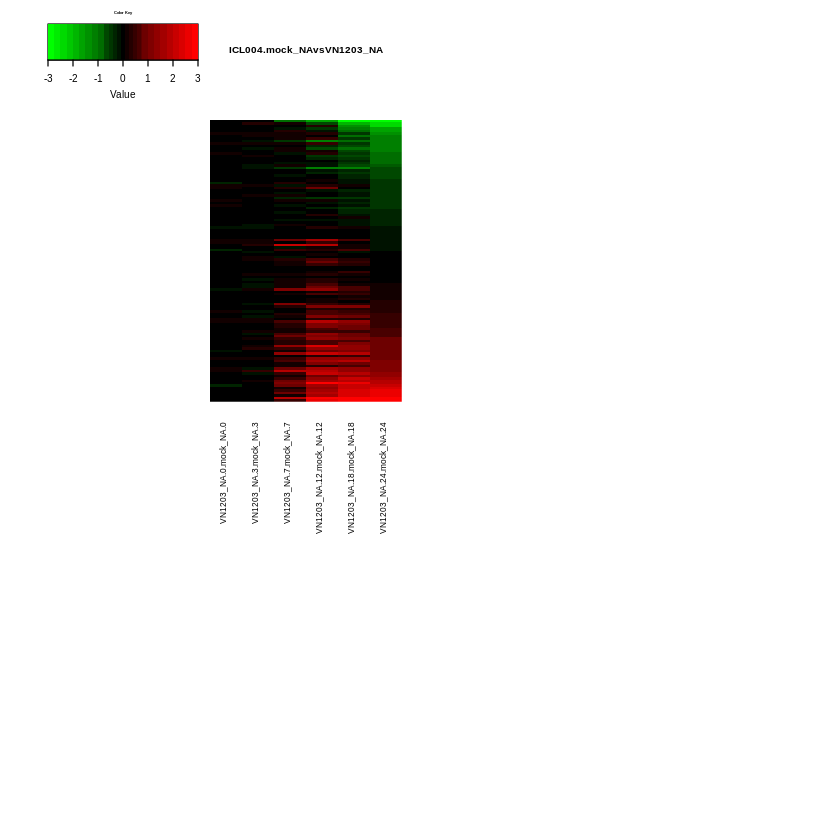

In [9]:
headmap_plot("ICL004.mock_NAvsVN1203_NA.DE.ISG.txt")

#### Examples for other studies

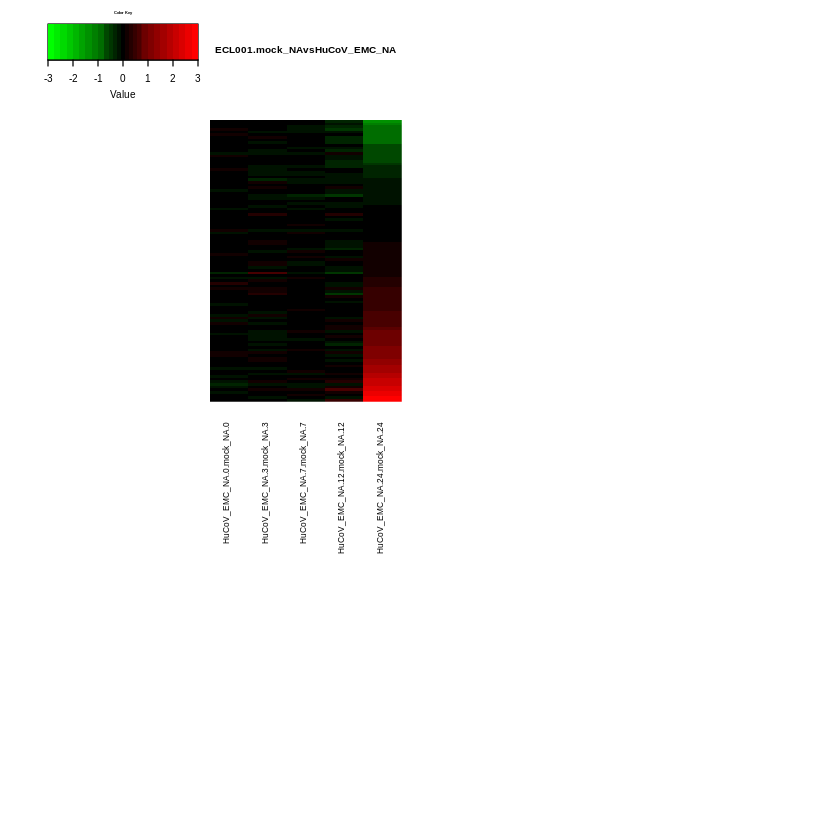

In [10]:
Select_ISG("CalU3_TypeI_ISG.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.txt")
headmap_plot("ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG.txt")

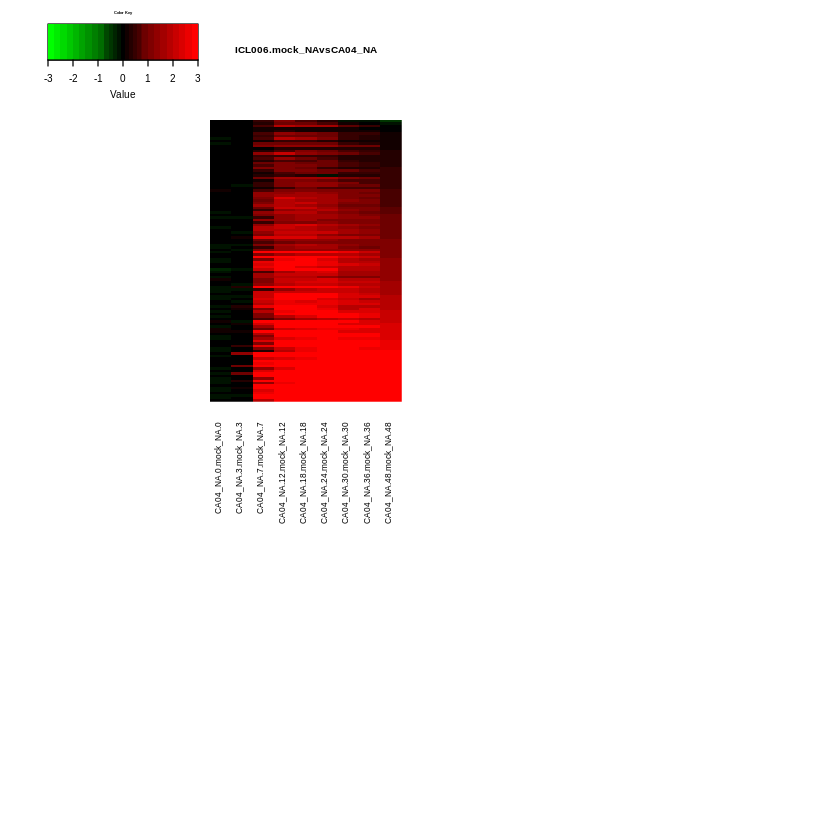

In [11]:
Select_ISG("CalU3_TypeI_ISG.txt","ICL006.mock_NAvsCA04_NA.DE.txt")
headmap_plot("ICL006.mock_NAvsCA04_NA.DE.ISG.txt")

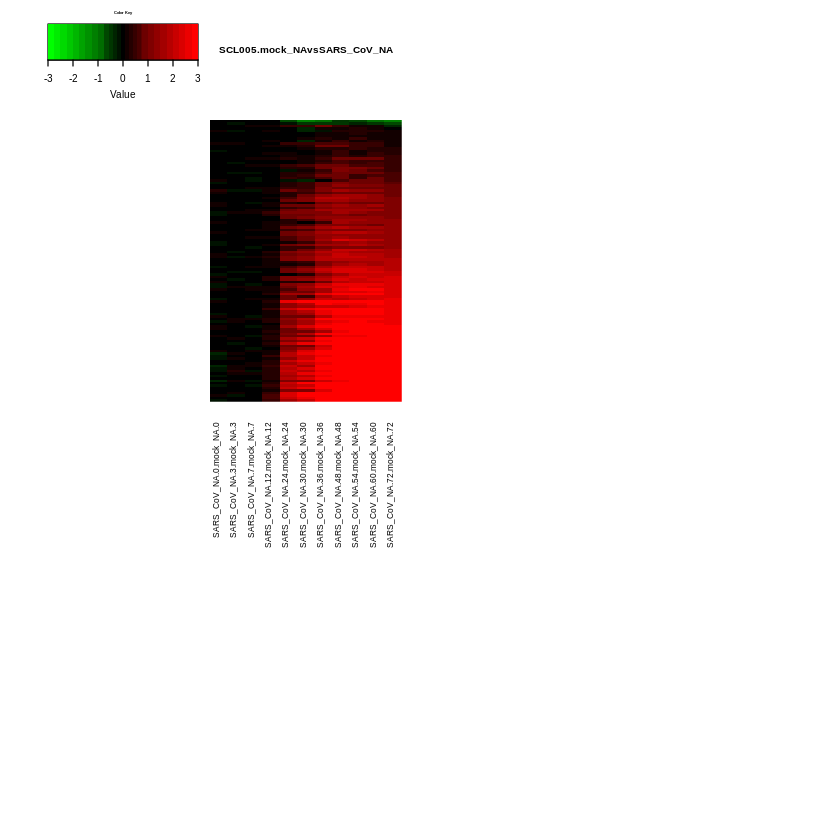

In [12]:
Select_ISG("CalU3_TypeI_ISG.txt","SCL005.mock_NAvsSARS_CoV_NA.DE.txt")
headmap_plot("SCL005.mock_NAvsSARS_CoV_NA.DE.ISG.txt")

#### Scientific User Case 2.3: Select ISG genes and plot heatmap to compare type I Interferon response among virus

#### Find commonly analysed ISG genes in studies ICL004, ICL006, ECL001 and SCL005

In [13]:
common_ISG("CalU3_TypeI_ISG.txt",c("ICL004.mock_NAvsVN1203_NA.DE.txt","ICL006.mock_NAvsCA04_NA.DE.txt","SCL005.mock_NAvsSARS_CoV_NA.DE.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.txt"))

[1] ACTN2    BATF2    BST2     CSAG1    CSAG2    CXCL10   CXCL11   FAM46A  
  [9] GBP4     HSPB9    IFI27    IFI44L   IFIH1    IFIT2    IFITM1   IRF1    
 [17] MT1B     MT1L     MT2A     MX1      MX2      OAS2     OASL     REC8    
 [25] RSAD2    SYNPO2   TAGAP    TMEM27   TNFSF13B USP18    ZBP1     ADAR    
 [33] APOL3    CD68     EIF2AK2  GBP5     HERC5    HSH2D    IFI35    IFI44   
 [41] IFIT1    IFIT3    IFIT5    IFITM2   IFITM3   IFITM4P  IRF7     ISG15   
 [49] LAMP3    LAP3     LGALS9   MYD88    PARP9    PNPT1    RASGRP3  SAMHD1  
 [57] TAP1     TDRD7    TRIM22   UBE2L6   XAF1     ZC3HAV1  ZCCHC2   ACE2    
 [65] APOBEC3G APOL6    BCL2L14  BTC      CASP1    CFB      CFH      CFHR1   
 [73] CFHR3    DDX58    DTX3L    EPSTI1   ETV7     GBP1     GMPR     HERC6   
 [81] HLA-F    IFI16    IL4I1    ISG20    LMO2     MLKL     NMI      OAS1    
 [89] OAS3     PARP12   PIK3AP1  RTP4     SAMD9    SAMD9L   SERPING1 SLC15A3 
 [97] SP110    STAT1    STAT2    TLR3     TMEM140  TRIM14   TRIM21   TRIM38  
[105] UBQLNL   ZNFX1   
114 Levels: ACE2 ACTN2 ADAR APOBEC3G APOL3 APOL6 BATF2 BCL2L14 BST2 ... ZNFX1

#### Rank ISG signatures. All the signatures were catagorized into three groups: commonly down-regulated in ICL004 and ECL001, down-regulated in ICL004 only and the rest group. Within each group, genes are ranked from smallest to largest at the last timepoint in ICL004.

In [14]:
order_ISG("ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

[1] "RTP4"     "SP110"    "NMI"      "HLA-F"    "BCL2L14"  "TLR3"    
  [7] "CFH"      "CASP1"    "APOL6"    "GBP1"     "LMO2"     "TRIM38"  
 [13] "ZCCHC2"   "APOL3"    "CFHR3"    "PIK3AP1"  "ACE2"     "APOBEC3G"
 [19] "STAT2"    "TRIM14"   "SLC15A3"  "ETV7"     "SERPING1" "HSH2D"   
 [25] "IRF7"     "DDX58"    "SAMD9L"   "PARP12"   "CFB"      "OAS1"    
 [31] "IL4I1"    "IFI16"    "ISG20"    "SAMD9"    "STAT1"    "MLKL"    
 [37] "ZNFX1"    "CFHR1"    "OAS3"     "TAP1"     "GMPR"     "HERC6"   
 [43] "PARP9"    "TRIM21"   "ADAR"     "DTX3L"    "EPSTI1"   "IFI44"   
 [49] "IFIT5"    "IFIT1"    "PNPT1"    "TRIM22"   "EIF2AK2"  "HERC5"   
 [55] "LGALS9"   "XAF1"     "SAMHD1"   "GBP5"     "ACTN2"    "RASGRP3" 
 [61] "TMEM140"  "SYNPO2"   "BTC"      "UBE2L6"   "IFITM3"   "IFIT3"   
 [67] "TAGAP"    "UBQLNL"   "CSAG2"    "MYD88"    "BST2"     "IFI35"   
 [73] "LAMP3"    "TDRD7"    "CD68"     "OAS2"     "IFITM2"   "LAP3"    
 [79] "IFITM4P"  "MX2"      "CXCL11"   "ZC3HAV1"  "REC8"     "ISG15"   
 [85] "RSAD2"    "IRF1"     "OASL"     "TMEM27"   "TNFSF13B" "ZBP1"    
 [91] "IFIH1"    "BATF2"    "GBP4"     "CSAG1"    "MX1"      "IFIT2"   
 [97] "IFITM1"   "MT1L"     "CXCL10"   "IFI44L"   "USP18"    "MT2A"    
[103] "HSPB9"    "IFI27"    "MT1B"     "FAM46A"

#### Plot heatmap for studies ICL006, ICL004, SCL005 and ECL001


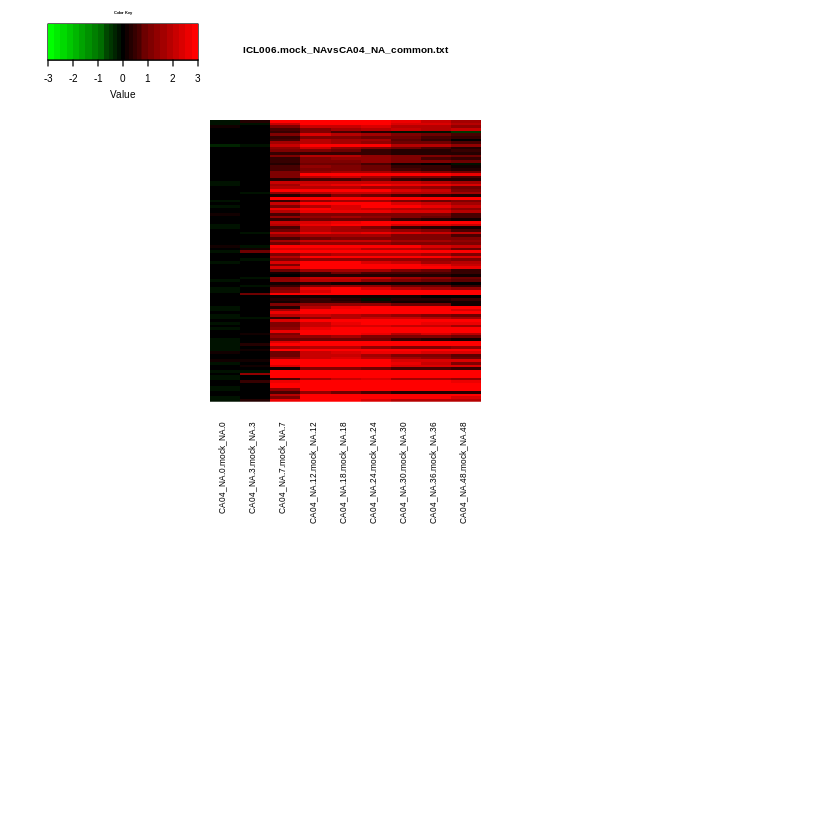

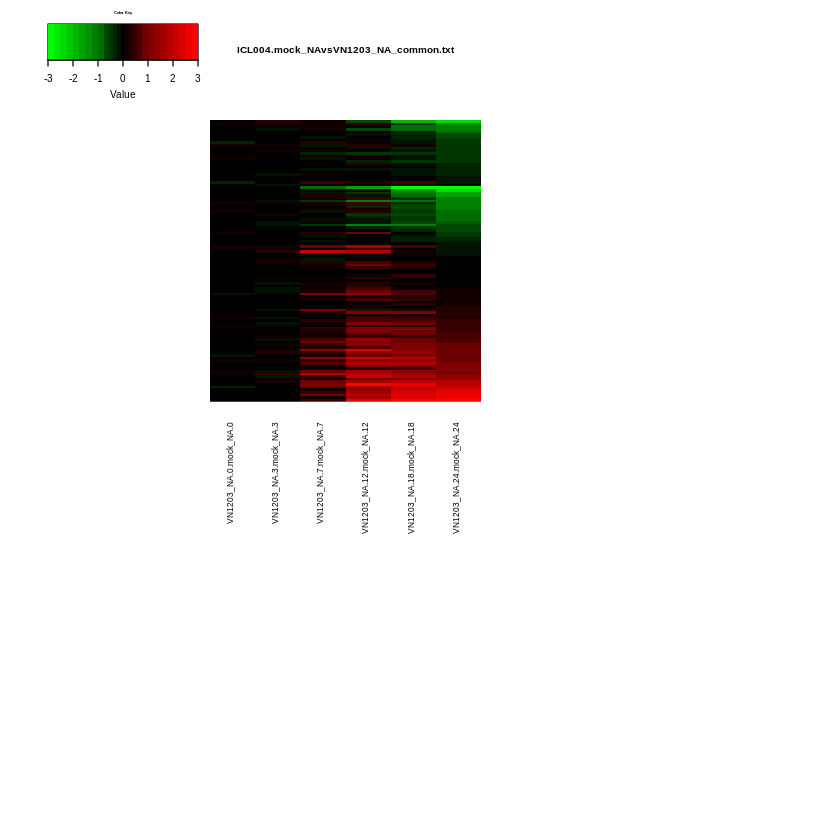

null device 
          1

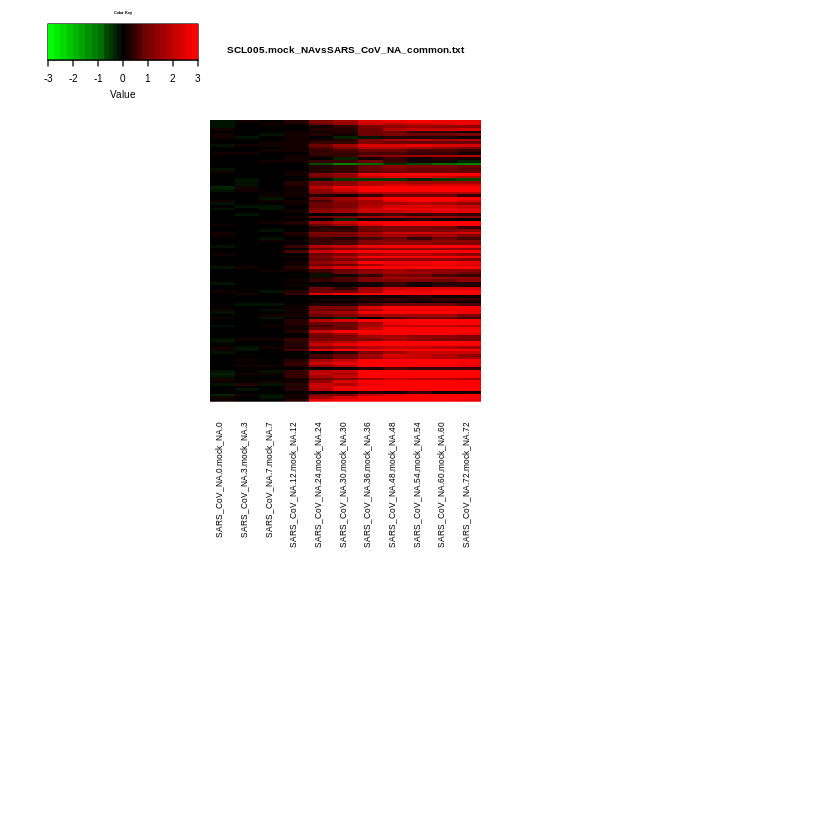

In [15]:
heatmap_plot_across(c("ICL006.mock_NAvsCA04_NA.DE.ISG_common.txt","ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","SCL005.mock_NAvsSARS_CoV_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt"),"ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

#### Plot signle heatmap and save in png format with high resolution

In [16]:
heatmap_plot_single("ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt","ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

In [17]:
heatmap_plot_single("ICL006.mock_NAvsCA04_NA.DE.ISG_common.txt","ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

In [18]:
heatmap_plot_single("ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

In [19]:
heatmap_plot_single("SCL005.mock_NAvsSARS_CoV_NA.DE.ISG_common.txt","ICL004.mock_NAvsVN1203_NA.DE.ISG_common.txt","ECL001.mock_NAvsHuCoV_EMC_NA.DE.ISG_common.txt")

<br>

#### Scientific User case 3.1: Veen diagram plot for differential expression proteins and ISG signatures

#### Query meta data and download protein quantifiation file

In [20]:
parse_cell_file("ICL006","protein","protein_expressions")
download_data("ICL006","protein","protein_expressions")

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
CA04_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
CA04_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
CA04_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,0,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,12,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,12,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba
mock_NA,12,ICL006_protein.tsv,e621bb05-0e01-4b8f-8a99-4539374623ba


[1] e621bb05-0e01-4b8f-8a99-4539374623ba
Levels: e621bb05-0e01-4b8f-8a99-4539374623ba


[1] "Finished Downloading"

#### T-test and G-test differential expression protein analysis for study ICL006

In [21]:
protein_DE_test("ICL006")

[1] "517 Up-regulated protein"


[1] "RBM47" "ILVBL" "POTEF" "TBAL3" "AP3B1" "SPT5H" "ODPX"  "QSOX1" "PSDE" 
[10] "MPP10"

#### Plot Veen diagram for significantly differentially expressed proteins and ISG signatures for study ICL006

[1] 517
[1] "Significant up-regulated ISG proteins:"
 [1] "DDX58" "ACTN2" "STAT1" "SAMD9" "PNPT1" "OAS3"  "IFIT3" "IFIT2" "IFIT1"
[10] "MX1"   "MX2"   "OAS2"  "TAP1"  "NMI"   "OASL"  "DTX3L" "OAS1"  "IFIH1"


(polygon[GRID.polygon.1], polygon[GRID.polygon.2], polygon[GRID.polygon.3], polygon[GRID.polygon.4], text[GRID.text.5], text[GRID.text.6], text[GRID.text.7], text[GRID.text.8]) 

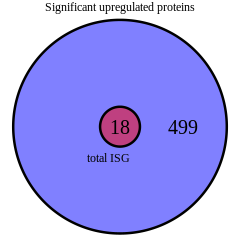

In [22]:
ISG_DE_protein("ICL006","CalU3_TypeI_ISG.txt")

#### Veen diagram plot for other studies

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
VN1203_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
VN1203_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
VN1203_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
mock_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
mock_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
mock_NA,0,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
VN1203_NA,3,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
VN1203_NA,3,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb
VN1203_NA,3,ICL004_protein.tsv,c2774501-e5c4-4acb-8b4b-23fe803205fb


[1] c2774501-e5c4-4acb-8b4b-23fe803205fb
Levels: c2774501-e5c4-4acb-8b4b-23fe803205fb


[1] "Finished Downloading"

[1] "406 Up-regulated protein"


[1] "TPM3L" "PGRC1" "PLOD2" "DDX3X" "CYR61" "CDKA1" "TIM23" "LSM1"  "ZN185"
[10] "YKT6"

[1] 406
[1] "Significant up-regulated ISG proteins:"
[1] "ACTN2"


(polygon[GRID.polygon.9], polygon[GRID.polygon.10], polygon[GRID.polygon.11], polygon[GRID.polygon.12], text[GRID.text.13], text[GRID.text.14], text[GRID.text.15], text[GRID.text.16]) 

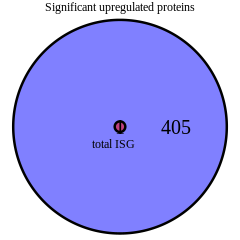

In [23]:
parse_cell_file("ICL004","protein","protein_expressions")
download_data("ICL004","protein","protein_expressions")
protein_DE_test("ICL004",3)
ISG_DE_protein("ICL004","CalU3_TypeI_ISG.txt")

virus,time_point,FileName,object_id
<fct>,<int>,<fct>,<fct>
mock_NA,0,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,0,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,0,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,3,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,3,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,3,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,24,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,24,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182
mock_NA,24,SCL005_protein.tsv,7b27d5a2-ddfb-4066-84f4-c9a145ced182


[1] 7b27d5a2-ddfb-4066-84f4-c9a145ced182
Levels: 7b27d5a2-ddfb-4066-84f4-c9a145ced182


[1] "Finished Downloading"

[1] "556 Up-regulated protein"


[1] "1433F" "1A01"  "1A02"  "1A03"  "1A11"  "1A23"  "1A24"  "1A25"  "1A26" 
[10] "1A29"

[1] 556
[1] "Significant up-regulated ISG proteins:"
[1] "ACTN2" "GBP1"  "ISG15" "MX1"   "MX2"   "PNPT1"


(polygon[GRID.polygon.17], polygon[GRID.polygon.18], polygon[GRID.polygon.19], polygon[GRID.polygon.20], text[GRID.text.21], text[GRID.text.22], text[GRID.text.23], text[GRID.text.24]) 

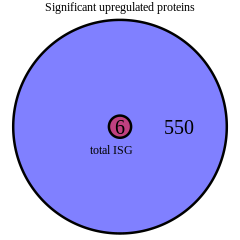

In [24]:
parse_cell_file("SCL005","protein","protein_expressions")
download_data("SCL005","protein","protein_expressions")
protein_DE_test("SCL005")
ISG_DE_protein("SCL005","CalU3_TypeI_ISG.txt")